In [1]:
from helper import load_image_from_url, render_results_in_image

f:\Open Source Models Using HF\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import pipeline

In [3]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

Building Object Detection Pipeline:

In [4]:
od_pipe = pipeline("object-detection", "./models/facebook/detr-resnet-50")

f:\Open Source Models Using HF\venv\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--timm--resnet50.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Using Pipeline Over Image:

In [5]:
from PIL import Image

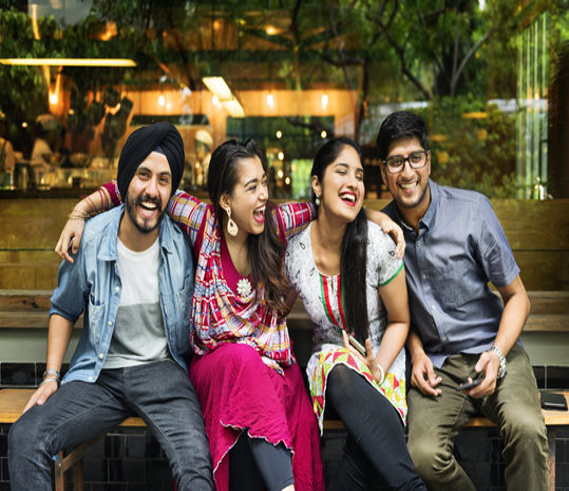

In [10]:
raw_image = Image.open('friends.jpg')
raw_image.resize((569, 491))

In [11]:
pipeline_output = od_pipe(raw_image)

In [12]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

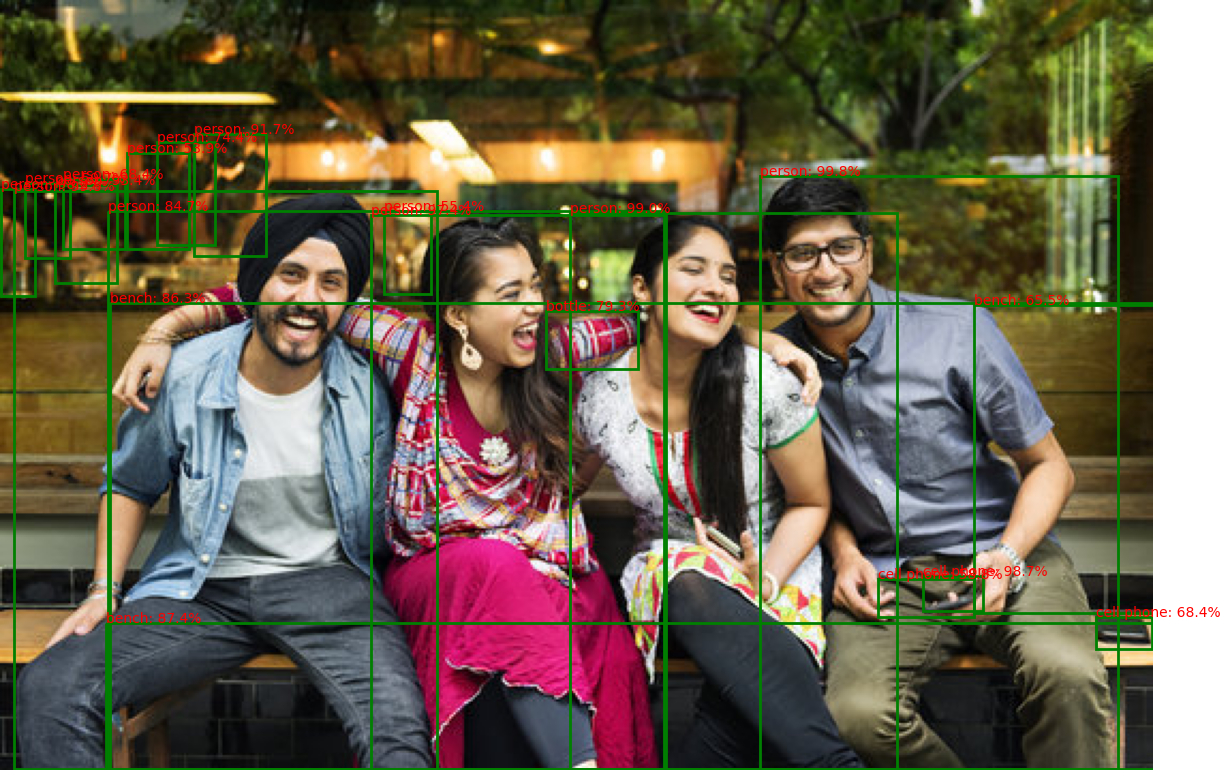

In [13]:
processed_image

Building Simple Gradio Interface:

In [14]:
import os
import gradio as gr

In [15]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [16]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [17]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

f:\Open Source Models Using HF\venv\lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.43.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://fa2c5342f63e752c16.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [18]:
demo.close()

Closing server running on port: 7860
